# Import Dependencies

In [19]:
# Gym - (For Trading)
import gym
import gym_anytrading

# Stable baselines - (RL Algorithms)
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Reading Data

In [20]:
df = pd.read_csv('data/gmedata.csv')

In [21]:
df.head()

,Date,Open,High,Low,Close,Volume
0,04/04/2022,166.98,173.24,156.51,170.73,"4,640,077"
1,04/01/2022,188.90,189.77,155.26,165.00,"13,189,560"
2,03/31/2022,163.10,175.75,158.51,166.58,"11,242,230"
3,03/30/2022,175.00,183.34,165.00,166.85,"9,169,186"
4,03/29/2022,188.24,199.41,163.00,179.90,"18,011,490"


In [22]:
len(df)

254

In [23]:
#Checking Null Values
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [24]:
df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume     object
dtype: object

In [25]:
# We convert Date column type to datetime64 so it will run with gym_anytraing
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume            object
dtype: object

In [26]:
# We set Date column as Index
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-04-04,166.98,173.24,156.51,170.73,"4,640,077"
2022-04-01,188.90,189.77,155.26,165.00,"13,189,560"
2022-03-31,163.10,175.75,158.51,166.58,"11,242,230"
2022-03-30,175.00,183.34,165.00,166.85,"9,169,186"
2022-03-29,188.24,199.41,163.00,179.90,"18,011,490"


In [27]:
# Passing Agent through the Trading Environment(stocks)
env = gym.make('stocks-v0', df = df, frame_bound = (5,250), window_size = 5)
## window_size(Agent takes this as reference to take decisions)
## frame_bound(Amount of data)

In [28]:
# Real prices over time. Used to calculate profit and render the environment.
env.prices

array([170.73, 165.  , 166.58, 166.85, 179.9 , 189.59, 151.95, 142.39,
       141.  , 123.14,  94.2 ,  90.79,  87.7 ,  86.86,  82.64,  78.11,
        92.69, 100.56, 105.21, 103.01,  99.35, 111.66, 118.41, 121.97,
       119.02, 123.34, 118.58, 124.58, 114.87, 118.06, 121.53, 123.41,
       128.33, 126.16, 117.09, 124.25, 122.47, 124.29, 115.6 , 102.34,
       102.34,  99.23, 100.04, 112.6 , 108.93,  97.91,  93.52, 103.26,
        99.79, 100.15, 106.36, 102.67, 106.57, 108.91, 116.65, 122.48,
       128.06, 130.3 , 131.15, 140.62, 131.03, 129.37, 148.91, 152.84,
       148.39, 155.33, 153.93, 146.46, 148.31, 152.14, 154.  , 158.12,
       157.14, 155.64, 144.59, 148.59, 147.69, 136.88, 159.01, 155.76,
       173.65, 177.81, 167.12, 172.39, 181.56, 179.84, 196.21, 202.01,
       199.72, 211.78, 213.9 , 247.55, 228.8 , 210.12, 210.  , 207.18,
       209.14, 202.1 , 204.32, 199.19, 206.6 , 218.64, 213.25, 217.84,
       218.33, 206.99, 200.09, 183.51, 182.85, 173.51, 177.84, 173.97,
      

In [29]:
# Extracted features over time. Used to create Gym observations.
## It subtracts with previous value
env.signal_features

array([[ 1.7073e+02,  0.0000e+00],
       [ 1.6500e+02, -5.7300e+00],
       [ 1.6658e+02,  1.5800e+00],
       [ 1.6685e+02,  2.7000e-01],
       [ 1.7990e+02,  1.3050e+01],
       [ 1.8959e+02,  9.6900e+00],
       [ 1.5195e+02, -3.7640e+01],
       [ 1.4239e+02, -9.5600e+00],
       [ 1.4100e+02, -1.3900e+00],
       [ 1.2314e+02, -1.7860e+01],
       [ 9.4200e+01, -2.8940e+01],
       [ 9.0790e+01, -3.4100e+00],
       [ 8.7700e+01, -3.0900e+00],
       [ 8.6860e+01, -8.4000e-01],
       [ 8.2640e+01, -4.2200e+00],
       [ 7.8110e+01, -4.5300e+00],
       [ 9.2690e+01,  1.4580e+01],
       [ 1.0056e+02,  7.8700e+00],
       [ 1.0521e+02,  4.6500e+00],
       [ 1.0301e+02, -2.2000e+00],
       [ 9.9350e+01, -3.6600e+00],
       [ 1.1166e+02,  1.2310e+01],
       [ 1.1841e+02,  6.7500e+00],
       [ 1.2197e+02,  3.5600e+00],
       [ 1.1902e+02, -2.9500e+00],
       [ 1.2334e+02,  4.3200e+00],
       [ 1.1858e+02, -4.7600e+00],
       [ 1.2458e+02,  6.0000e+00],
       [ 1.1487e+02,

# Building Environment and Training

In [30]:
## It gives value 2 as its actions are buying and selling
env.action_space

Discrete(2)

In [31]:
# Passing Agent to Stocks Environment
env_maker = lambda: gym.make('stocks-v0', df = df, frame_bound = (5,250), window_size = 5)
env = DummyVecEnv([env_maker])

In [32]:
# Training Agent to Environment
model = A2C('MlpPolicy', env, verbose = 1) 
model.learn(total_timesteps = 1000000)
## We are going to run this Model till 'explained_variance' is close to 1 and 'value_loss' should be low as possible

Using cpu device
------------------------------------
| time/                 |          |
|    fps                | 3256     |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.687   |
|    explained_variance | -4.97    |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -4.19    |
|    value_loss         | 38.8     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 3257     |
|    iterations         | 200      |
|    time_elapsed       | 0        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -0.679   |
|    explained_variance | -0.0458  |
|    learning_rate      | 0.0007   |
|    n_updates          | 199      |
|    policy_loss        | 5.12     |
|    value_loss      

KeyboardInterrupt: 

# Evaluation

In [33]:
env = gym.make('stocks-v0', df = df, frame_bound = (180,200), window_size = 5) # New Environment for Plotting
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs) # Using Model to predict actions
    obs, rewards, done, info = env.step(action)
    if done:
        print("Info: ", info)
        break

Info:  {'total_reward': 12.969999999999999, 'total_profit': 1.0329876604772297, 'position': 0}


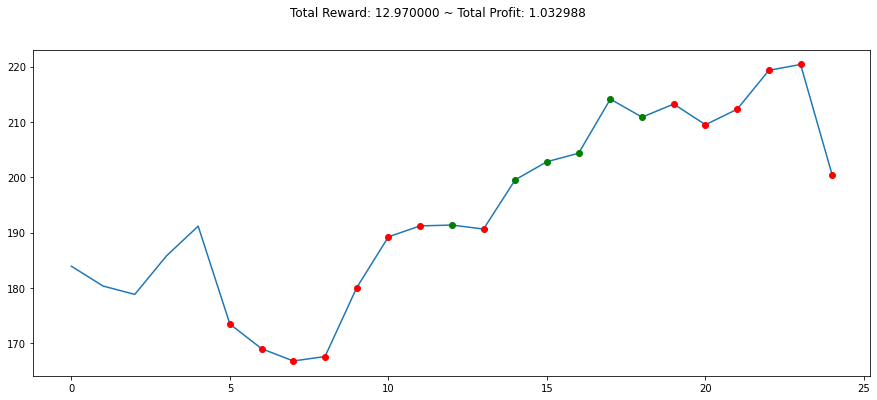

In [34]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()